### データの整理・クレンジング


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

font = {"family": "Yu Mincho"}
plt.rc("font", **font)
df = pd.read_csv("data/stock_price.csv")
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日付      9547 non-null   str    
 1   終値      9547 non-null   float64
 2   始値      9547 non-null   float64
 3   高値      9547 non-null   float64
 4   安値      9547 non-null   float64
 5   出来高     9547 non-null   str    
 6   変化率 %   9547 non-null   str    
dtypes: float64(4), str(3)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131.30M,-0.57%
1,2025-12-29,158.6,159.0,159.1,157.5,143.79M,-0.13%
2,2025-12-26,158.8,157.4,158.9,157.2,152.24M,1.34%
3,2025-12-25,156.7,156.5,157.0,156.2,78.06M,0.26%
4,2025-12-24,156.3,156.0,156.3,155.3,101.92M,0.00%


In [2]:
df["日付"] = pd.to_datetime(df["日付"])
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      9547 non-null   datetime64[us]
 1   終値      9547 non-null   float64       
 2   始値      9547 non-null   float64       
 3   高値      9547 non-null   float64       
 4   安値      9547 non-null   float64       
 5   出来高     9547 non-null   str           
 6   変化率 %   9547 non-null   str           
dtypes: datetime64[us](1), float64(4), str(2)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131.30M,-0.57%
1,2025-12-29,158.6,159.0,159.1,157.5,143.79M,-0.13%
2,2025-12-26,158.8,157.4,158.9,157.2,152.24M,1.34%
3,2025-12-25,156.7,156.5,157.0,156.2,78.06M,0.26%
4,2025-12-24,156.3,156.0,156.3,155.3,101.92M,0.00%


In [3]:
df["出来高"] = df["出来高"].map(
    lambda x: float(x[:-1]) * 1e6 if x[-1] == "M" else float(x[:-1]) * 1e9,
    na_action="ignore",
)
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      9547 non-null   datetime64[us]
 1   終値      9547 non-null   float64       
 2   始値      9547 non-null   float64       
 3   高値      9547 non-null   float64       
 4   安値      9547 non-null   float64       
 5   出来高     9547 non-null   float64       
 6   変化率 %   9547 non-null   str           
dtypes: datetime64[us](1), float64(5), str(1)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57%
1,2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13%
2,2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34%
3,2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26%
4,2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00%


In [4]:
df["変化率 %"] = df["変化率 %"].str.slice(stop=-1)
df["変化率 %"] = pd.to_numeric(df["変化率 %"], errors="raise")
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      9547 non-null   datetime64[us]
 1   終値      9547 non-null   float64       
 2   始値      9547 non-null   float64       
 3   高値      9547 non-null   float64       
 4   安値      9547 non-null   float64       
 5   出来高     9547 non-null   float64       
 6   変化率 %   9547 non-null   float64       
dtypes: datetime64[us](1), float64(6)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57
1,2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13
2,2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34
3,2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26
4,2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00


In [5]:
df = df.rename(
    columns={
        "日付": "Date",
        "終値": "Close",
        "始値": "Open",
        "高値": "High",
        "安値": "Low",
        "出来高": "Volume",
        "変化率 %": "Change %",
    }
)
df.head()

,Date,Close,Open,High,Low,Volume,Change %
0,2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57
1,2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13
2,2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34
3,2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26
4,2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00


In [6]:
df = df.set_index("Date")
display(df.head())

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57
2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13
2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34
2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26
2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00


### 株価グラフ


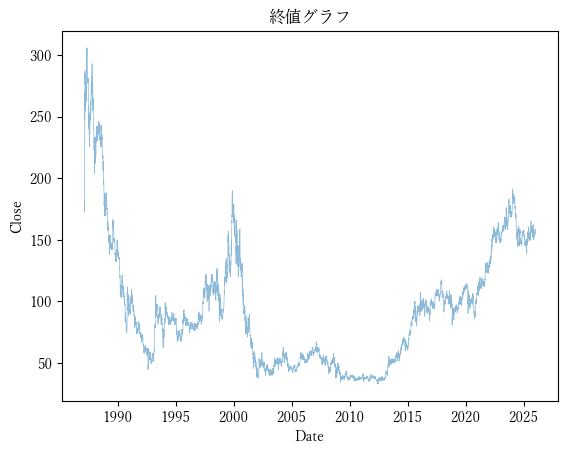

In [7]:
plt.plot(df.index, df["Close"], alpha=0.5, linewidth=0.5)
plt.xlabel(str(df.index.name))
plt.ylabel(str(df["Close"].name))
plt.title("終値グラフ")
plt.show()

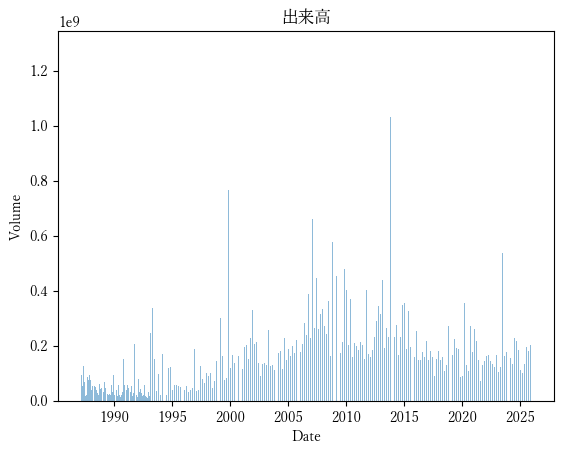

In [8]:
plt.bar(df.index, df["Volume"], alpha=0.5, width=1)
plt.xlabel(str(df.index.name))
plt.ylabel(str(df["Volume"].name))
plt.title("出来高")
plt.show()

In [9]:
start_date = pd.to_datetime('2025-12-01')
end_date = pd.to_datetime('2025-12-30')
df_dec25 = df.loc[end_date:start_date, :]
df_dec25 = df_dec25.iloc[::-1]
display(df_dec25.head())

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-12-01,155.8,156.0,156.2,154.7,146050000.0,0.00
2025-12-02,155.7,156.4,156.8,155.5,143210000.0,-0.06
2025-12-03,154.7,155.8,156.1,154.5,166640000.0,-0.64
2025-12-04,155.6,154.4,156.0,153.9,165080000.0,0.58
2025-12-05,153.9,155.0,155.2,153.9,150710000.0,-1.09


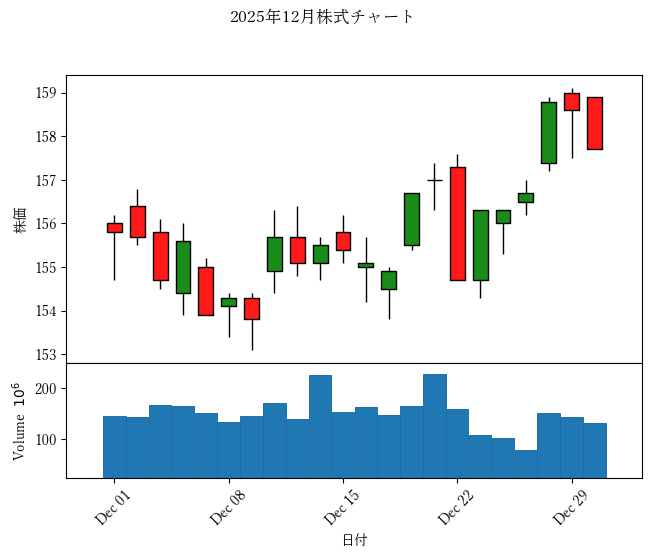

In [10]:
rcpdict = {"font.family": "Yu Mincho"}
mc = mpf.make_marketcolors(up='g', down='r')
s = mpf.make_mpf_style(rc=rcpdict, marketcolors=mc)
mpf.plot(df_dec25, type="candle", title="2025年12月株式チャート", xlabel="日付", ylabel="株価", style=s, volume=True)
mpf.show()

## 移動平均 (2025年)

In [11]:
start_date = pd.to_datetime('2025-01-06')
end_date = pd.to_datetime('2025-12-30')
df_2025 = df.loc[end_date:start_date]
df_2025 = df_2025.iloc[::-1]
display(df_2025.head())

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.0,159.1,159.3,156.1,184900000.0,-0.63
2025-01-07,157.5,157.1,157.8,156.5,135970000.0,0.32
2025-01-08,156.4,157.0,157.2,156.1,132050000.0,-0.70
2025-01-09,155.5,156.2,156.5,155.2,120370000.0,-0.58
2025-01-10,153.7,155.0,155.7,153.6,133810000.0,-1.16


,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.000000,159.100000,159.300000,156.100000,1.849000e+08,-0.630000
2025-01-07,157.250000,158.100000,158.550000,156.300000,1.604350e+08,-0.155000
2025-01-08,156.966667,157.733333,158.100000,156.233333,1.509733e+08,-0.336667
2025-01-09,156.600000,157.350000,157.700000,155.975000,1.433225e+08,-0.397500
2025-01-10,156.020000,156.880000,157.300000,155.500000,1.414200e+08,-0.550000
2025-01-14,153.950000,154.550000,155.400000,153.350000,1.452800e+08,-0.415000
2025-01-15,153.900000,154.300000,154.900000,153.200000,1.349250e+08,-0.030000
2025-01-16,153.266667,154.000000,154.533333,152.800000,1.386600e+08,-0.366667
2025-01-17,152.650000,153.350000,153.775000,152.150000,1.440325e+08,-0.472500


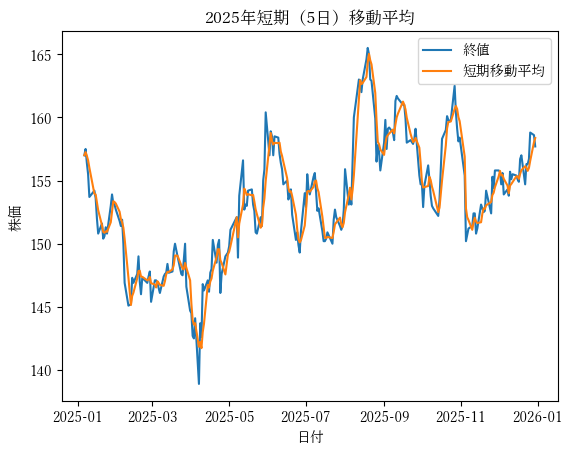

In [12]:
df_2025_rshort = df_2025.rolling('5D').mean()
display(df_2025_rshort.head(10))
plt.plot(df_2025.index, df_2025['Close'], label='終値')
plt.plot(df_2025_rshort.index, df_2025_rshort['Close'], label='短期移動平均')
plt.title('2025年短期（5日）移動平均')
plt.xlabel('日付')
plt.ylabel('株価')
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.000000,159.100000,159.300000,156.100000,1.849000e+08,-0.630000
2025-01-07,157.250000,158.100000,158.550000,156.300000,1.604350e+08,-0.155000
2025-01-08,156.966667,157.733333,158.100000,156.233333,1.509733e+08,-0.336667
2025-01-09,156.600000,157.350000,157.700000,155.975000,1.433225e+08,-0.397500
2025-01-10,156.020000,156.880000,157.300000,155.500000,1.414200e+08,-0.550000
2025-01-14,155.716667,156.416667,156.933333,155.100000,1.439750e+08,-0.403333
2025-01-15,155.414286,156.142857,156.614286,154.842857,1.395643e+08,-0.401429
2025-01-16,154.987500,155.800000,156.262500,154.487500,1.403850e+08,-0.481250
2025-01-17,154.522222,155.311111,155.733333,154.011111,1.425811e+08,-0.515556


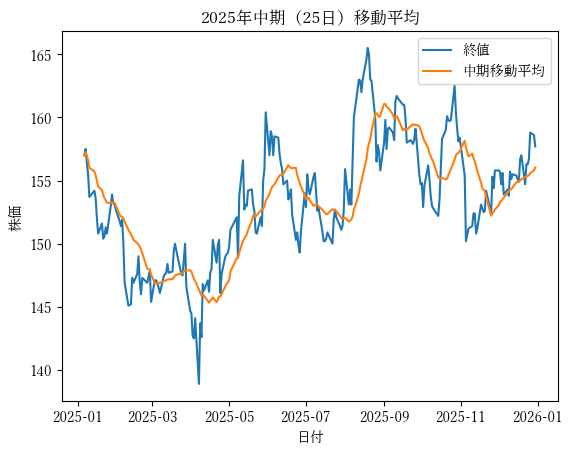

In [13]:
df_2025_rmid = df_2025.rolling("25D").mean()
display(df_2025_rmid.head(10))
plt.plot(df_2025.index, df_2025["Close"], label="終値")
plt.plot(df_2025_rmid.index, df_2025_rmid["Close"], label="中期移動平均")
plt.title("2025年中期（25日）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.000000,159.100000,159.300000,156.100000,1.849000e+08,-0.630000
2025-01-07,157.250000,158.100000,158.550000,156.300000,1.604350e+08,-0.155000
2025-01-08,156.966667,157.733333,158.100000,156.233333,1.509733e+08,-0.336667
2025-01-09,156.600000,157.350000,157.700000,155.975000,1.433225e+08,-0.397500
2025-01-10,156.020000,156.880000,157.300000,155.500000,1.414200e+08,-0.550000
2025-01-14,155.716667,156.416667,156.933333,155.100000,1.439750e+08,-0.403333
2025-01-15,155.414286,156.142857,156.614286,154.842857,1.395643e+08,-0.401429
2025-01-16,154.987500,155.800000,156.262500,154.487500,1.403850e+08,-0.481250
2025-01-17,154.522222,155.311111,155.733333,154.011111,1.425811e+08,-0.515556


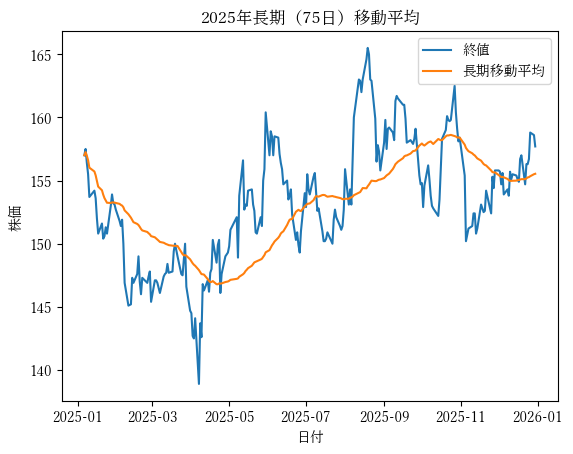

In [14]:
df_2025_rlong = df_2025.rolling("75D").mean()
display(df_2025_rlong.head(10))
plt.plot(df_2025.index, df_2025["Close"], label="終値")
plt.plot(df_2025_rlong.index, df_2025_rlong["Close"], label="長期移動平均")
plt.title("2025年長期（75日）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

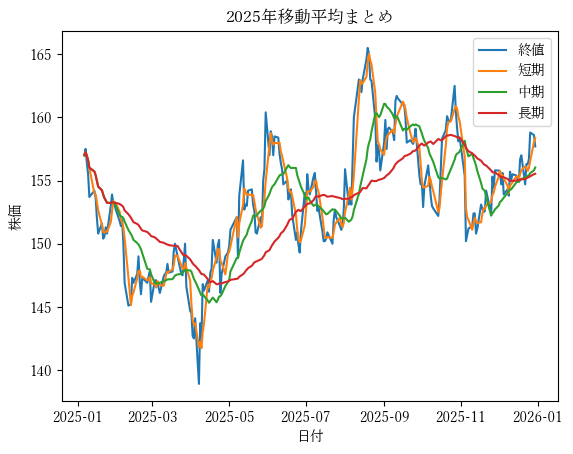

In [15]:
plt.plot(df_2025.index, df_2025["Close"], label="終値")
plt.plot(df_2025_rshort.index, df_2025_rshort['Close'], label='短期')
plt.plot(df_2025_rmid.index, df_2025_rmid['Close'], label='中期')
plt.plot(df_2025_rlong.index, df_2025_rlong["Close"], label="長期")
plt.title("2025年移動平均まとめ")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

## 移動平均（全体）

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
1987-12-31,261.388235,262.240724,265.033937,258.830769,1.295949e+08,0.173982
1988-12-31,219.296341,219.893089,221.904878,218.113821,6.276398e+07,-0.059350
1989-12-31,150.830242,151.241935,152.526613,149.933065,5.486230e+07,-0.072177
1990-12-31,106.429675,106.804472,108.050813,105.461789,4.885699e+07,-0.135081
1991-12-31,86.082927,86.294309,87.229675,85.413415,4.722760e+07,-0.099675
1992-12-31,59.542915,59.701619,60.294737,59.079757,3.623113e+07,-0.077449
1993-12-31,81.242683,81.276016,82.349187,80.250000,1.400872e+08,0.134390
1994-12-31,86.287449,86.318623,87.053441,85.630769,9.284085e+07,0.079798
1995-12-31,77.868675,77.898394,78.651406,77.185944,6.731333e+07,0.000321


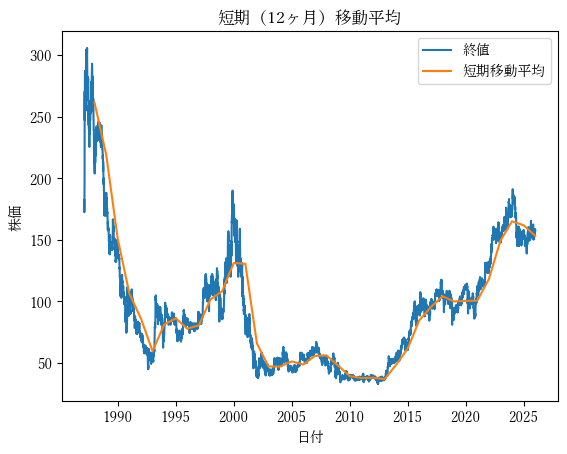

In [16]:
df_rshort = df.resample('YE').mean()
display(df_rshort.head(10))
plt.plot(df.index, df["Close"], label="終値")
plt.plot(df_rshort.index, df_rshort["Close"], label="短期移動平均")
plt.title("短期（12ヶ月）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
1987-12-31,261.388235,262.240724,265.033937,258.830769,1.295949e+08,0.173982
1989-12-31,184.924696,185.428543,187.075304,183.885425,5.879715e+07,-0.065789
1991-12-31,96.256301,96.549390,97.640244,95.437602,4.804230e+07,-0.117378
1993-12-31,70.370791,70.466937,71.299594,69.643408,8.805385e+07,0.028256
1995-12-31,82.061089,82.091532,82.835484,81.391331,8.002562e+07,0.039899
1997-12-31,91.126626,91.068293,92.017683,90.128049,7.697789e+07,0.075955
1999-12-31,119.691667,119.802236,121.263618,118.092683,1.328346e+08,0.116606
2001-12-31,98.382186,98.594534,100.064575,96.856883,1.974475e+08,-0.242955
2003-12-31,47.119959,47.118941,47.745010,46.484521,2.163699e+08,0.066843


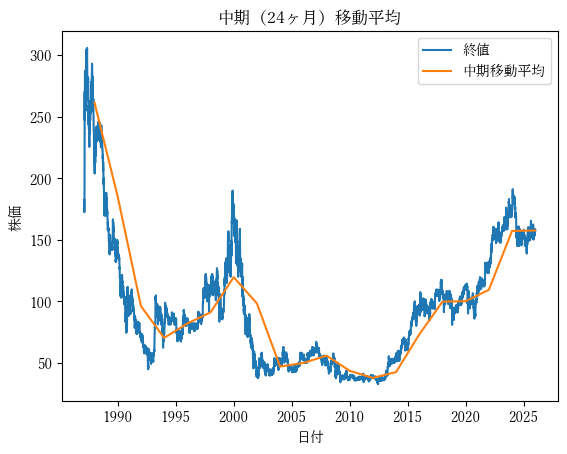

In [17]:
df_rmid = df.resample("2YE").mean()
display(df_rmid.head(10))
plt.plot(df.index, df["Close"], label="終値")
plt.plot(df_rmid.index, df_rmid["Close"], label="中期移動平均")
plt.title("中期（24ヶ月）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
1987-02-28,214.225000,210.308333,217.733333,207.025000,6.854425e+08,4.325833
1992-02-29,159.409570,159.923277,161.467640,158.264639,6.031685e+07,-0.086261
1997-02-28,77.639239,77.706634,78.454773,76.971440,8.014583e+07,0.033617
2002-02-28,106.132169,106.216003,107.646548,104.585540,1.558503e+08,-0.023810
2007-02-28,50.713171,50.719431,51.278780,50.158211,2.287499e+08,0.049593
2012-02-29,43.081654,43.085258,43.545618,42.639312,2.762030e+08,-0.024193
2017-02-28,67.263347,67.255184,67.930776,66.610612,2.520140e+08,0.087494
2022-02-28,105.706814,105.645977,106.485714,104.915681,1.601286e+08,0.036100
2027-02-28,158.458448,158.462380,159.553241,157.448353,1.602407e+08,0.025441


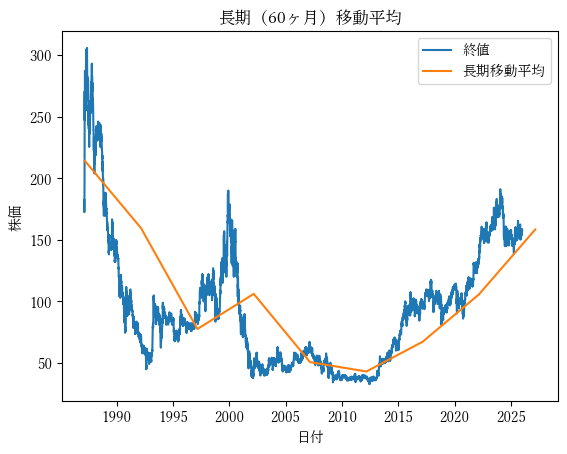

In [18]:
df_rlong = df.resample("60ME").mean()
display(df_rlong.head(10))
plt.plot(df.index, df["Close"], label="終値")
plt.plot(df_rlong.index, df_rlong["Close"], label="長期移動平均")
plt.title("長期（60ヶ月）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

## 線形回帰による予測

### 全体

#### 短期移動平均を使う場合

In [19]:
df_rshort['Year'] = df_rshort.index.values.astype("float64")
X = df_rshort[['Year']]
y = df_rshort['Close']
display(X.head())
print(y.head())

,Year
Date,
1987-12-31,5.679072e+14
1988-12-31,5.995296e+14
1989-12-31,6.310656e+14
1990-12-31,6.626016e+14
1991-12-31,6.941376e+14


Date
1987-12-31    261.388235
1988-12-31    219.296341
1989-12-31    150.830242
1990-12-31    106.429675
1991-12-31     86.082927
Freq: YE-DEC, Name: Close, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  3.100000e+01
mean   1.158370e+15
std    3.765084e+14
min    5.679072e+14
25%    8.361792e+14
50%    1.167523e+15
75%    1.483099e+15
max    1.767139e+15
               Year
count  8.000000e+00
mean   1.203044e+15
std    3.057163e+14
min    8.203680e+14
25%    9.229464e+14
50%    1.246450e+15
75%    1.435774e+15
max    1.609373e+15


In [21]:
from sklearn.linear_model import LinearRegression

model_short = LinearRegression()
model_short.fit(X_train, y_train)
y_pred = model_short.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 1159.2909462013408
R^2: -0.43783976747565556


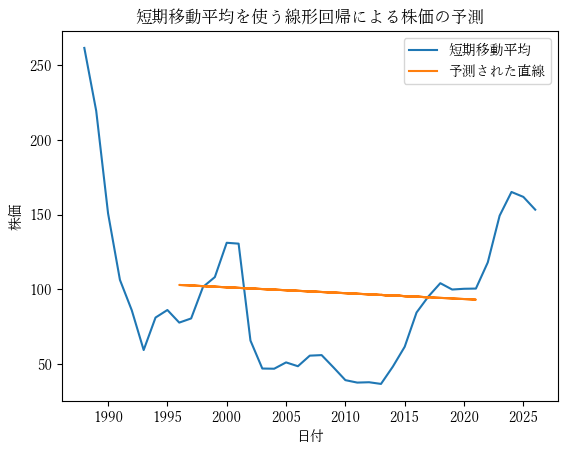

In [23]:
plt.plot(df_rshort.index, df_rshort['Close'], label='短期移動平均')
plt.plot(X_test.index, y_pred, label='予測された直線')
plt.title('短期移動平均を使う線形回帰による株価の予測')
plt.xlabel('日付')
plt.ylabel('株価')
plt.legend()
plt.show()

#### 中期移動平均を使う場合

In [24]:
df_rmid["Year"] = df_rmid.index.values.astype("float64")
X = df_rmid[['Year']]
y = df_rmid['Close']
display(X.head())
print(y.head())

,Year
Date,
1987-12-31,5.679072e+14
1989-12-31,6.310656e+14
1991-12-31,6.941376e+14
1993-12-31,7.572960e+14
1995-12-31,8.203680e+14


Date
1987-12-31    261.388235
1989-12-31    184.924696
1991-12-31     96.256301
1993-12-31     70.370791
1995-12-31     82.061089
Freq: 2YE-DEC, Name: Close, dtype: float64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  1.600000e+01
mean   1.242475e+15
std    3.749697e+14
min    5.679072e+14
25%    9.781992e+14
50%    1.293754e+15
75%    1.530446e+15
max    1.767139e+15
               Year
count  4.000000e+00
mean   8.677152e+14
std    1.737966e+14
min    6.941376e+14
25%    7.415064e+14
50%    8.519472e+14
75%    9.781560e+14
max    1.072829e+15


In [26]:
model_mid = LinearRegression()
model_mid.fit(X_train, y_train)
y_pred = model_mid.predict(X_test)

In [27]:
print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 2082.9091570197484
R^2: -1.806810325632978


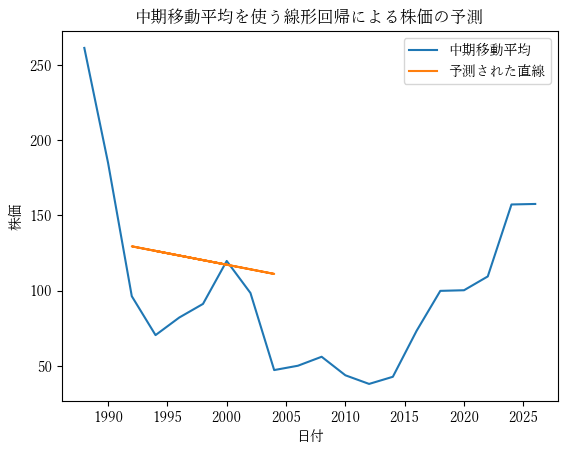

In [28]:
plt.plot(df_rmid.index, df_rmid['Close'], label='中期移動平均')
plt.plot(X_test.index, y_pred, label='予測された直線')
plt.title('中期移動平均を使う線形回帰による株価の予測')
plt.xlabel('日付')
plt.ylabel('株価')
plt.legend()
plt.show()

#### 長期移動平均を使う場合

In [29]:
df_rlong["Year"] = df_rlong.index.values.astype("float64")
X = df_rlong[['Year']]
y = df_rlong['Close']
display(X.head())
print(y.head())

,Year
Date,
1987-02-28,5.414688e+14
1992-02-29,6.993216e+14
1997-02-28,8.570880e+14
2002-02-28,1.014854e+15
2007-02-28,1.172621e+15


Date
1987-02-28    214.225000
1992-02-29    159.409570
1997-02-28     77.639239
2002-02-28    106.132169
2007-02-28     50.713171
Freq: 60ME, Name: Close, dtype: float64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  7.000000e+00
mean   1.217734e+15
std    4.795812e+14
min    5.414688e+14
25%    8.570880e+14
50%    1.330474e+15
75%    1.567123e+15
max    1.803773e+15
               Year
count  2.000000e+00
mean   1.014854e+15
std    2.231154e+14
min    8.570880e+14
25%    9.359712e+14
50%    1.014854e+15
75%    1.093738e+15
max    1.172621e+15


In [ ]:
model_long = LinearRegression()
model_long.fit(X_train, y_train)
y_pred = model_long.predict(X_test)

In [32]:
print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 5021.4850435708395
R^2: -26.70424148678372


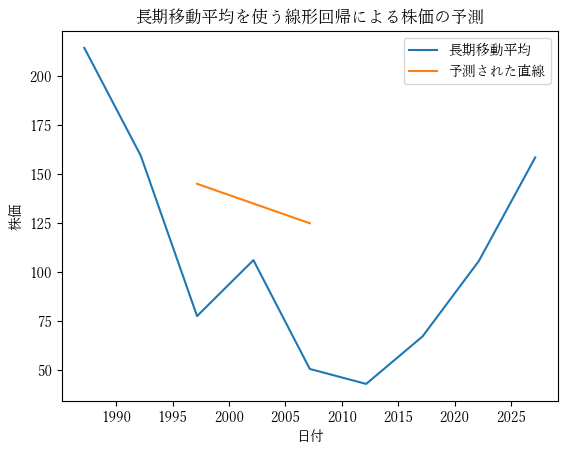

In [33]:
plt.plot(df_rlong.index, df_rlong['Close'], label='長期移動平均')
plt.plot(X_test.index, y_pred, label='予測された直線')
plt.title('長期移動平均を使う線形回帰による株価の予測')
plt.xlabel('日付')
plt.ylabel('株価')
plt.legend()
plt.show()

### 過去10年（2015~2025）

In [34]:
start_date = pd.to_datetime("2015-01-05")
end_date = pd.to_datetime("2025-12-30")
df_10yr = df.loc[end_date:start_date]
df_10yr = df_10yr.iloc[::-1]
display(df_10yr.head())

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2015-01-05,61.0,61.5,61.8,60.2,288170000.0,-1.77
2015-01-06,60.8,61.1,61.7,60.5,357990000.0,-0.33
2015-01-07,60.5,60.7,61.2,60.5,264190000.0,-0.49
2015-01-08,62.0,61.3,62.2,60.9,291910000.0,2.48
2015-01-09,63.7,62.5,63.7,62.5,289710000.0,2.74


,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2015-12-31,84.617623,84.527459,85.588525,83.721311,2.400448e+08,0.198648
2016-12-31,95.360816,95.380408,96.334694,94.350612,2.098282e+08,0.022490
2017-12-31,104.203239,104.170850,104.864372,103.544130,1.781422e+08,0.036194
2018-12-31,99.967755,99.922857,100.770612,99.162449,1.724496e+08,-0.053347
2019-12-31,100.466805,100.363900,101.069295,99.712863,1.461320e+08,0.091369
2020-12-31,100.609504,100.484298,101.516942,99.646694,1.648149e+08,-0.003595
2021-12-31,118.082041,118.057959,118.954694,117.330204,1.477104e+08,0.078571
2022-12-31,149.314344,149.255328,150.359426,148.272131,1.389291e+08,0.079426
2023-12-31,165.147154,165.125203,166.288211,164.150813,1.474940e+08,0.060488


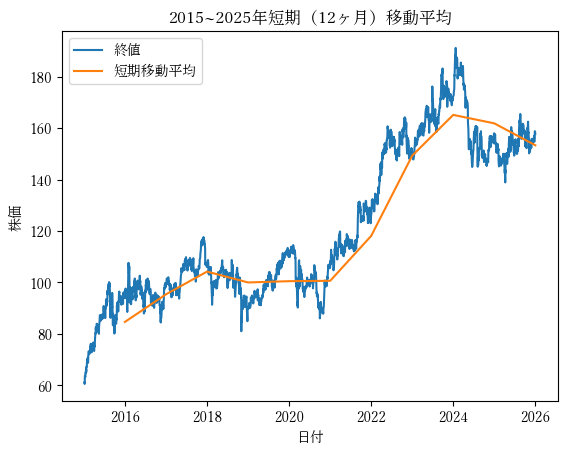

In [36]:
df_10yrshort = df_10yr.resample("YE").mean()
display(df_10yrshort.head(10))
plt.plot(df_10yr.index, df_10yr["Close"], label="終値")
plt.plot(df_10yrshort.index, df_10yrshort["Close"], label="短期移動平均")
plt.title("2015~2025年短期（12ヶ月）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2015-12-31,84.617623,84.527459,85.588525,83.721311,2.400448e+08,0.198648
2017-12-31,99.800000,99.793496,100.616870,98.966057,1.939208e+08,0.029370
2019-12-31,100.215226,100.141564,100.918724,99.435391,1.593991e+08,0.018416
2021-12-31,109.399589,109.325257,110.289528,108.542916,1.562100e+08,0.037741
2023-12-31,157.263061,157.222653,158.356327,156.243878,1.432290e+08,0.069918
2025-12-31,157.604918,157.658197,158.693238,156.617213,1.751397e+08,-0.011701


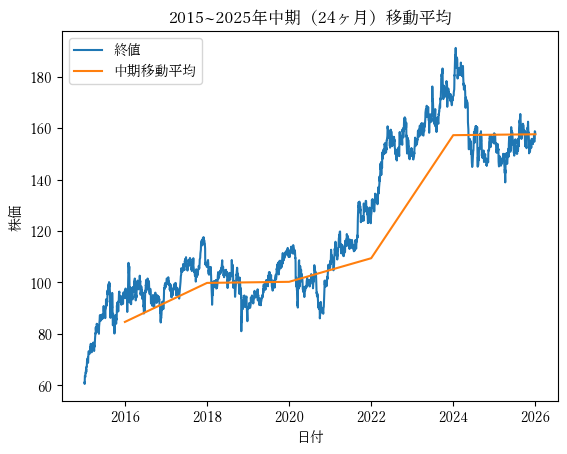

In [38]:
df_10yrmid = df_10yr.resample("2YE").mean()
display(df_10yrmid.head(10))
plt.plot(df_10yr.index, df_10yr["Close"], label="終値")
plt.plot(df_10yrmid.index, df_10yrmid["Close"], label="中期移動平均")
plt.title("2015~2025年中期（24ヶ月）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2015-12-31,84.617623,84.527459,85.588525,83.721311,2.400448e+08,0.198648
2020-12-31,100.125984,100.069180,100.915656,99.288033,1.743953e+08,0.018467
2025-12-31,149.550450,149.550695,150.597547,148.597383,1.568597e+08,0.039084


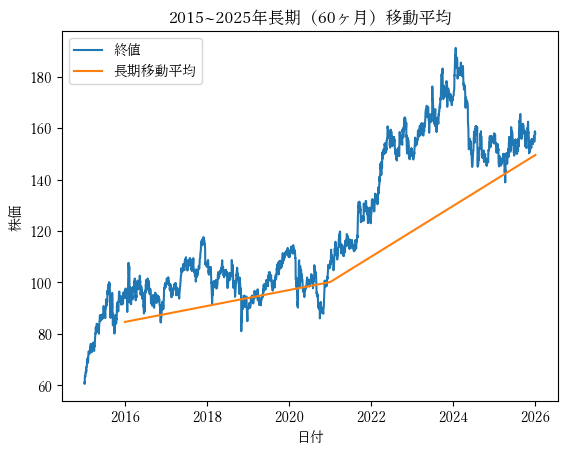

In [39]:
df_10yrlong = df_10yr.resample("5YE").mean()
display(df_10yrlong.head(10))
plt.plot(df_10yr.index, df_10yr["Close"], label="終値")
plt.plot(df_10yrlong.index, df_10yrlong["Close"], label="長期移動平均")
plt.title("2015~2025年長期（60ヶ月）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

#### 短期移動平均を使う場合

In [46]:
df_10yrshort['Year'] = df_10yrshort.index.values.astype("float64")
X = df_10yrshort[['Year']]
y = df_10yrshort['Close']
display(X.head())
print(y.head())

,Year
Date,
2015-12-31,1.451520e+15
2016-12-31,1.483142e+15
2017-12-31,1.514678e+15
2018-12-31,1.546214e+15
2019-12-31,1.577750e+15


Date
2015-12-31     84.617623
2016-12-31     95.360816
2017-12-31    104.203239
2018-12-31     99.967755
2019-12-31    100.466805
Freq: YE-DEC, Name: Close, dtype: float64


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  8.000000e+00
mean   1.625119e+15
std    1.093294e+14
min    1.451520e+15
25%    1.561982e+15
50%    1.625141e+15
75%    1.711886e+15
max    1.767139e+15
               Year
count  3.000000e+00
mean   1.567267e+15
std    9.639121e+13
min    1.483142e+15
25%    1.514678e+15
50%    1.546214e+15
75%    1.609330e+15
max    1.672445e+15


In [48]:
model_short = LinearRegression()
model_short.fit(X_train, y_train)
y_pred = model_short.predict(X_test)

In [49]:
print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 89.86007357503621
R^2: 0.8493205655578564


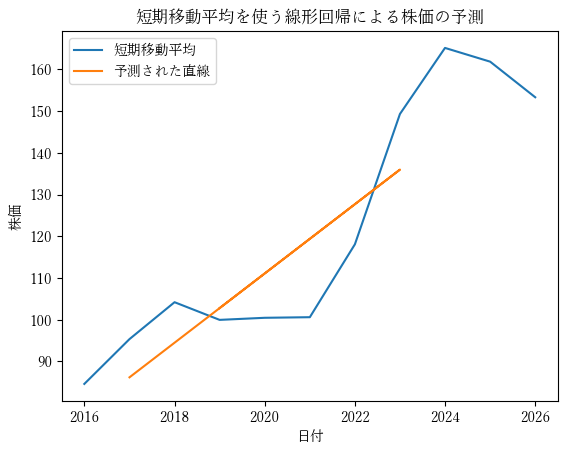

In [51]:
plt.plot(df_10yrshort.index, df_10yrshort["Close"], label="短期移動平均")
plt.plot(X_test.index, y_pred, label="予測された直線")
plt.title("短期移動平均を使う線形回帰による株価の予測")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

#### 中期移動平均を使う場合

In [52]:
df_10yrmid['Year'] = df_10yrmid.index.values.astype("float64")
X = df_10yrmid[['Year']]
y = df_10yrmid['Close']
display(X.head())
print(y.head())

,Year
Date,
2015-12-31,1.451520e+15
2017-12-31,1.514678e+15
2019-12-31,1.577750e+15
2021-12-31,1.640909e+15
2023-12-31,1.703981e+15


Date
2015-12-31     84.617623
2017-12-31     99.800000
2019-12-31    100.215226
2021-12-31    109.399589
2023-12-31    157.263061
Freq: 2YE-DEC, Name: Close, dtype: float64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  4.000000e+00
mean   1.672445e+15
std    8.149253e+13
min    1.577750e+15
25%    1.625119e+15
50%    1.672445e+15
75%    1.719770e+15
max    1.767139e+15
               Year
count  2.000000e+00
mean   1.483099e+15
std    4.465973e+13
min    1.451520e+15
25%    1.467310e+15
50%    1.483099e+15
75%    1.498889e+15
max    1.514678e+15


In [ ]:
model_mid = LinearRegression()
model_mid.fit(X_train, y_train)
y_pred = model_mid.predict(X_test)

In [55]:
print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 745.0857966861859
R^2: -11.929648855643027


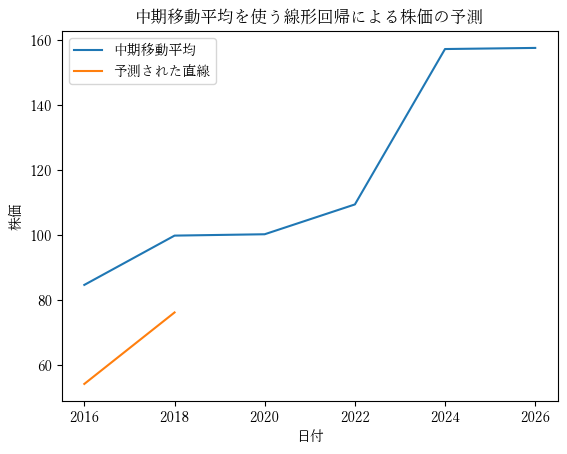

In [56]:
plt.plot(df_10yrmid.index, df_10yrmid["Close"], label="中期移動平均")
plt.plot(X_test.index, y_pred, label="予測された直線")
plt.title("中期移動平均を使う線形回帰による株価の予測")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

#### 長期移動平均を使う場合

In [57]:
df_10yrlong["Year"] = df_10yrlong.index.values.astype("float64")
X = df_10yrlong[['Year']]
y = df_10yrlong['Close']
display(X.head())
print(y.head())

,Year
Date,
2015-12-31,1.451520e+15
2020-12-31,1.609373e+15
2025-12-31,1.767139e+15


Date
2015-12-31     84.617623
2020-12-31    100.125984
2025-12-31    149.550450
Freq: 5YE-DEC, Name: Close, dtype: float64


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  2.000000e+00
mean   1.530446e+15
std    1.116188e+14
min    1.451520e+15
25%    1.490983e+15
50%    1.530446e+15
75%    1.569910e+15
max    1.609373e+15
               Year
count  1.000000e+00
mean   1.767139e+15
std             NaN
min    1.767139e+15
25%    1.767139e+15
50%    1.767139e+15
75%    1.767139e+15
max    1.767139e+15


In [59]:
model_long = LinearRegression()
model_long.fit(X_train, y_train)
y_pred = model_long.predict(X_test)

In [60]:
print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 1150.8780699908573
R^2: nan


c:\Users\tobyl\projects\stock_price\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


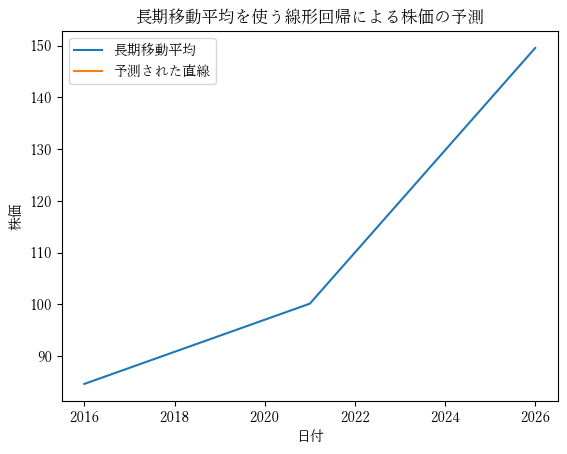

In [61]:
plt.plot(df_10yrlong.index, df_10yrlong["Close"], label="長期移動平均")
plt.plot(X_test.index, y_pred, label="予測された直線")
plt.title("長期移動平均を使う線形回帰による株価の予測")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

### 過去1年（2025）から推測

#### 短期平均を使う場合

In [62]:
df_2025_rshort['Year'] = df_2025_rshort.index.values.astype("float64")
X = df_2025_rshort[['Year']]
y = df_2025_rshort['Close']
display(X.head())
print(y.head())

,Year
Date,
2025-01-06,1.736122e+15
2025-01-07,1.736208e+15
2025-01-08,1.736294e+15
2025-01-09,1.736381e+15
2025-01-10,1.736467e+15


Date
2025-01-06    157.000000
2025-01-07    157.250000
2025-01-08    156.966667
2025-01-09    156.600000
2025-01-10    156.020000
Name: Close, dtype: float64


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  1.940000e+02
mean   1.752390e+15
std    8.999455e+12
min    1.736122e+15
25%    1.744783e+15
50%    1.752581e+15
75%    1.759946e+15
max    1.767053e+15
               Year
count  4.900000e+01
mean   1.748422e+15
std    8.340504e+12
min    1.736986e+15
25%    1.740960e+15
50%    1.747267e+15
75%    1.754611e+15
max    1.765843e+15


In [64]:
model_short = LinearRegression()
model_short.fit(X_train, y_train)
y_pred = model_short.predict(X_test)

In [65]:
print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 13.43018779904975
R^2: 0.35927482497380947


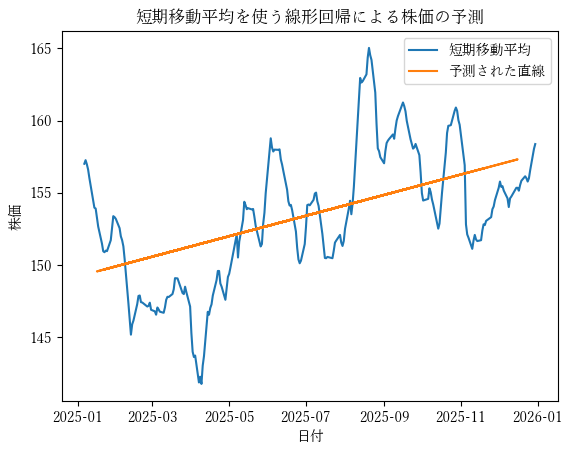

In [67]:
plt.plot(df_2025_rshort.index, df_2025_rshort["Close"], label="短期移動平均")
plt.plot(X_test.index, y_pred, label="予測された直線")
plt.title("短期移動平均を使う線形回帰による株価の予測")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

#### 中期移動平均を使う場合

In [68]:
df_2025_rmid["Year"] = df_2025_rmid.index.values.astype("float64")
X = df_2025_rmid[['Year']]
y = df_2025_rmid['Close']
display(X.head())
print(y.head())

,Year
Date,
2025-01-06,1.736122e+15
2025-01-07,1.736208e+15
2025-01-08,1.736294e+15
2025-01-09,1.736381e+15
2025-01-10,1.736467e+15


Date
2025-01-06    157.000000
2025-01-07    157.250000
2025-01-08    156.966667
2025-01-09    156.600000
2025-01-10    156.020000
Name: Close, dtype: float64


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  1.940000e+02
mean   1.751308e+15
std    9.210181e+12
min    1.736122e+15
25%    1.743206e+15
50%    1.750939e+15
75%    1.759342e+15
max    1.766966e+15
               Year
count  4.900000e+01
mean   1.752709e+15
std    8.085010e+12
min    1.736467e+15
25%    1.746144e+15
50%    1.753315e+15
75%    1.759190e+15
max    1.767053e+15


In [70]:
model_mid = LinearRegression()
model_mid.fit(X_train, y_train)
y_pred = model_mid.predict(X_test)

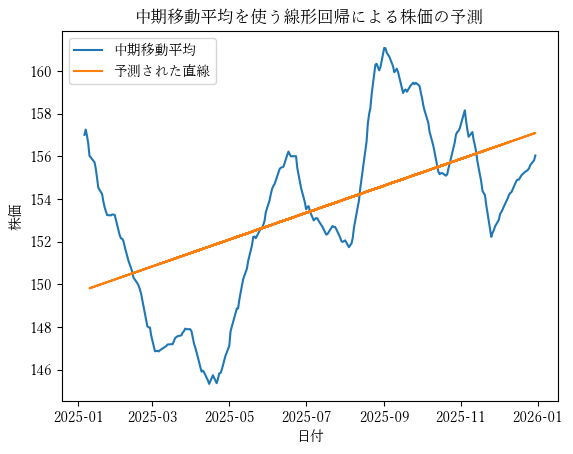

In [71]:
plt.plot(df_2025_rmid.index, df_2025_rmid["Close"], label="中期移動平均")
plt.plot(X_test.index, y_pred, label="予測された直線")
plt.title("中期移動平均を使う線形回帰による株価の予測")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

#### 長期移動平均を使う場合

In [72]:
df_2025_rlong["Year"] = df_2025_rlong.index.values.astype("float64")
X = df_2025_rlong[['Year']]
y = df_2025_rlong['Close']
display(X.head())
print(y.head())

,Year
Date,
2025-01-06,1.736122e+15
2025-01-07,1.736208e+15
2025-01-08,1.736294e+15
2025-01-09,1.736381e+15
2025-01-10,1.736467e+15


Date
2025-01-06    157.000000
2025-01-07    157.250000
2025-01-08    156.966667
2025-01-09    156.600000
2025-01-10    156.020000
Name: Close, dtype: float64


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.describe())
print(X_test.describe())

               Year
count  1.940000e+02
mean   1.751618e+15
std    9.131150e+12
min    1.736122e+15
25%    1.744178e+15
50%    1.751371e+15
75%    1.759622e+15
max    1.767053e+15
               Year
count  4.900000e+01
mean   1.751480e+15
std    8.531126e+12
min    1.736813e+15
25%    1.743552e+15
50%    1.752538e+15
75%    1.758845e+15
max    1.766362e+15


In [74]:
model_long = LinearRegression()
model_long.fit(X_train, y_train)
y_pred = model_long.predict(X_test)

In [75]:
print("Mean Sqaured Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Mean Sqaured Error: 5.312910644372899
R^2: 0.5238325853324546


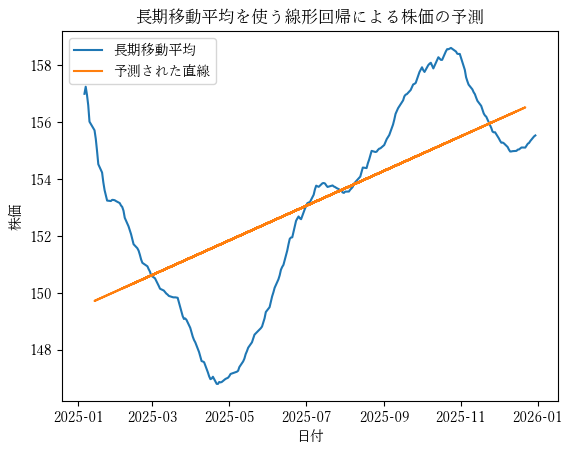

In [76]:
plt.plot(df_2025_rlong.index, df_2025_rlong['Close'], label='長期移動平均')
plt.plot(X_test.index, y_pred, label='予測された直線')
plt.title('長期移動平均を使う線形回帰による株価の予測')
plt.xlabel('日付')
plt.ylabel('株価')
plt.legend()
plt.show()